In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')  

display('train', train_data.head())
display('test', test_data.head()) 

'train'

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


'test'

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [3]:
# Basic information about datasets
print("Train Data Info")
train_data.info()
print("Test Data Info")
test_data.info()

Train Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
Test Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #  

In [4]:
# Checking missing values
print("Missing values in train dataset:\n", train_data.isnull().sum())
print("\nMissing values in test dataset:\n", test_data.isnull().sum())

Missing values in train dataset:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Missing values in test dataset:
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [5]:
# Handling missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])
test_data['HomePlanet'] = test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0])

train_data['CryoSleep'] = train_data['CryoSleep'].fillna(False)
test_data['CryoSleep'] = test_data['CryoSleep'].fillna(False)

train_data['Cabin'] = train_data['Cabin'].fillna(train_data['Cabin'].mode()[0])
test_data['Cabin'] = test_data['Cabin'].fillna(test_data['Cabin'].mode()[0])

train_data['VIP'] = train_data['VIP'].fillna(train_data['VIP'].mode()[0])
test_data['VIP'] = test_data['VIP'].fillna(test_data['VIP'].mode()[0])

train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)  # Replacing null values in service columns with 0
test_data[['RoomService','FoodCourt','ShoppingMall', 'Spa', 'VRDeck']] = test_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)  # Replacing null values in test set

train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].mode()[0])
test_data['Destination'] = test_data['Destination'].fillna(test_data['Destination'].mode()[0])

In [6]:
# Checking if missing values are handled
print("\nAfter handling missing values:")
print("Train Data Missing Values:\n", train_data.isnull().sum())
print("Test Data Missing Values:\n", test_data.isnull().sum())


After handling missing values:
Train Data Missing Values:
 PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64
Test Data Missing Values:
 PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64


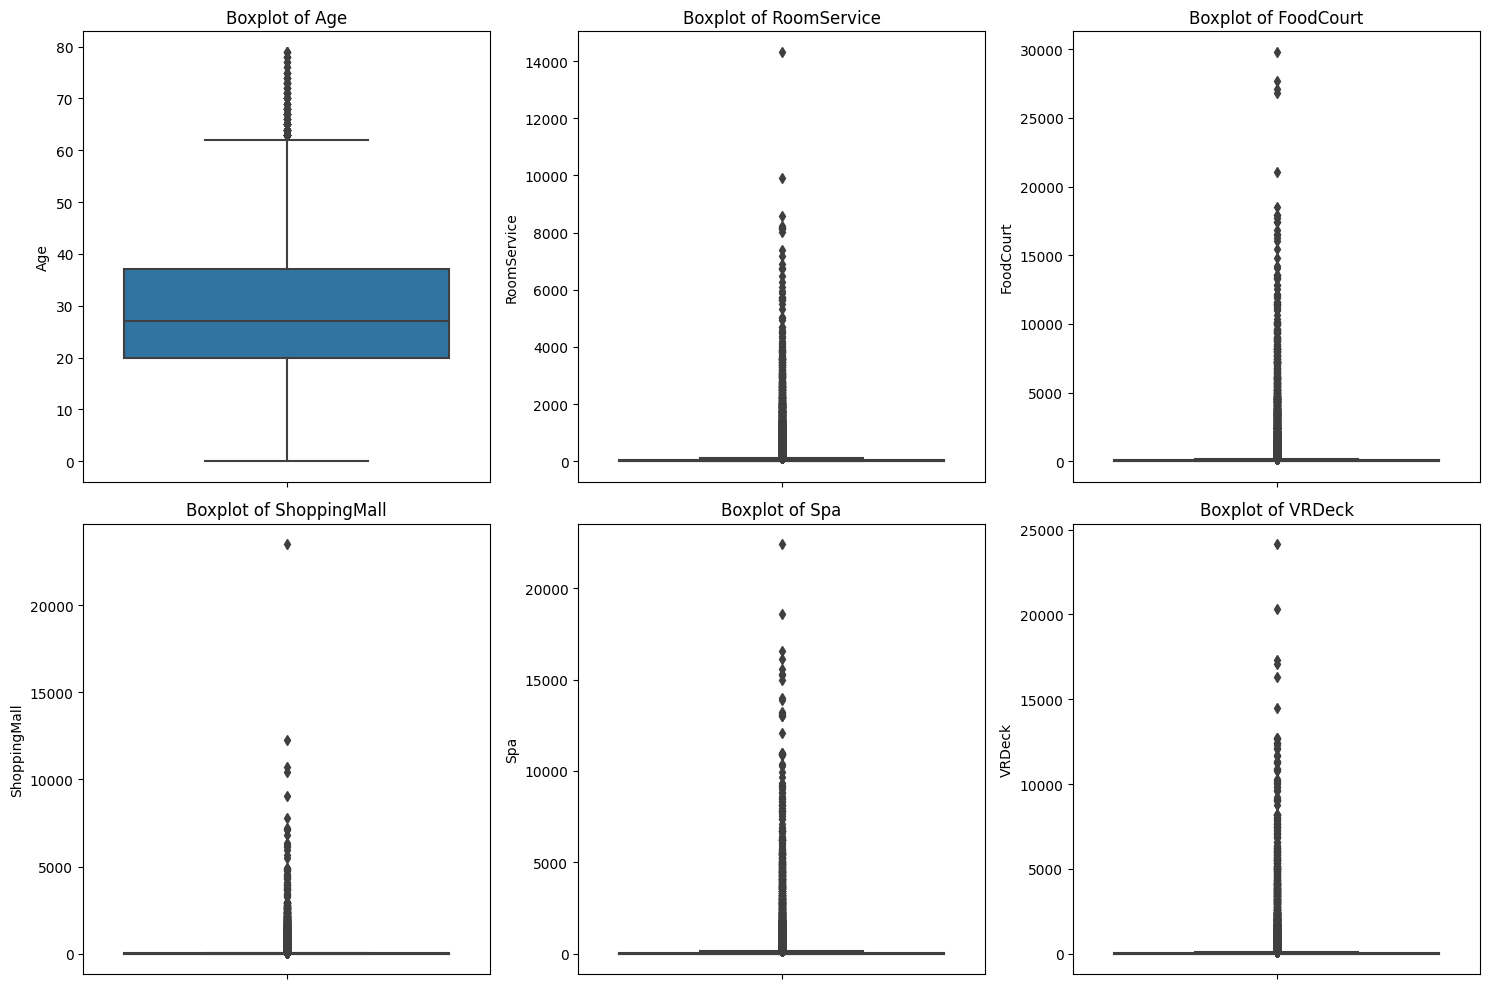

In [7]:
# Exploratory Data Analysis (EDA) for training data 
numerical_columns = train_data.select_dtypes(include=['number']).columns.tolist()

# Set up the figure size and grid layout
num_columns = 3  # Define how many columns of plots you want
num_rows = (len(numerical_columns) // num_columns) + (len(numerical_columns) % num_columns > 0)

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
axs = axs.flatten()  # Flatten to make indexing easier

# Plot the boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=train_data[column], ax=axs[i])
    axs[i].set_title(f'Boxplot of {column}')

# Hide any empty subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

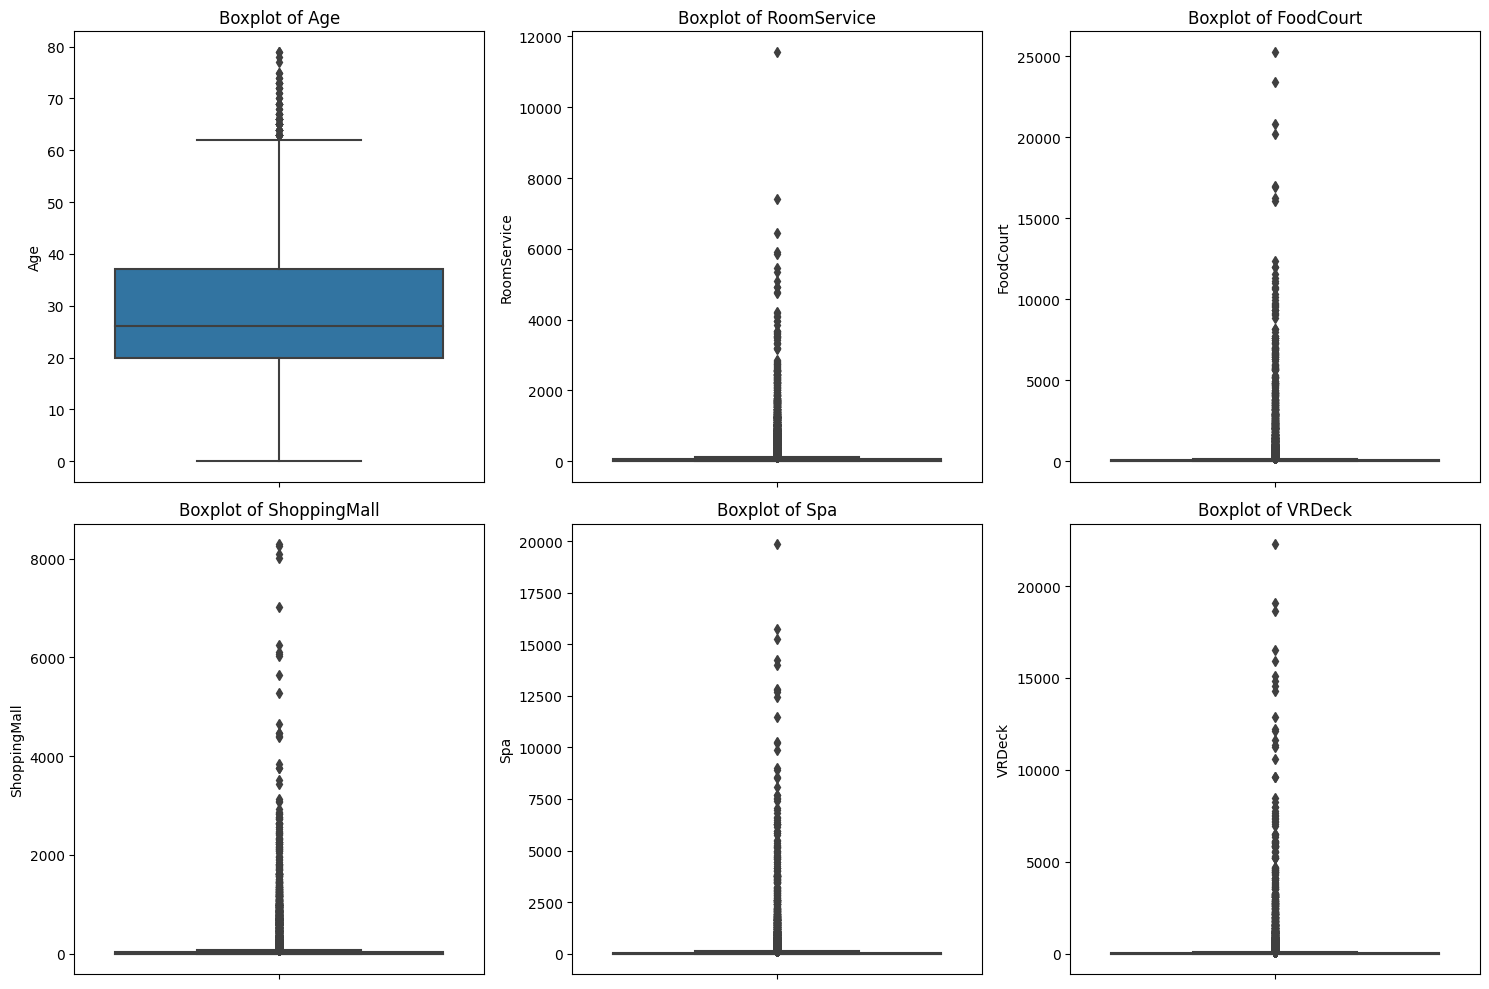

In [8]:
# Exploratory Data Analysis (EDA) for testing dataset
numerical_columns = test_data.select_dtypes(include=['number']).columns.tolist()

# Set up the figure size and grid layout
num_columns = 3  # Define how many columns of plots you want
num_rows = (len(numerical_columns) // num_columns) + (len(numerical_columns) % num_columns > 0)

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
axs = axs.flatten()  # Flatten to make indexing easier

# Plot the boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=test_data[column], ax=axs[i])
    axs[i].set_title(f'Boxplot of {column}')

# Hide any empty subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [9]:
for col in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
    upper_limit = train_data[col].quantile(0.95)
    train_data[col] = np.where(train_data[col] > upper_limit, upper_limit, train_data[col])
    
for col in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
    upper_limit = test_data[col].quantile(0.95)
    test_data[col] = np.where(test_data[col] > upper_limit, upper_limit, test_data[col])

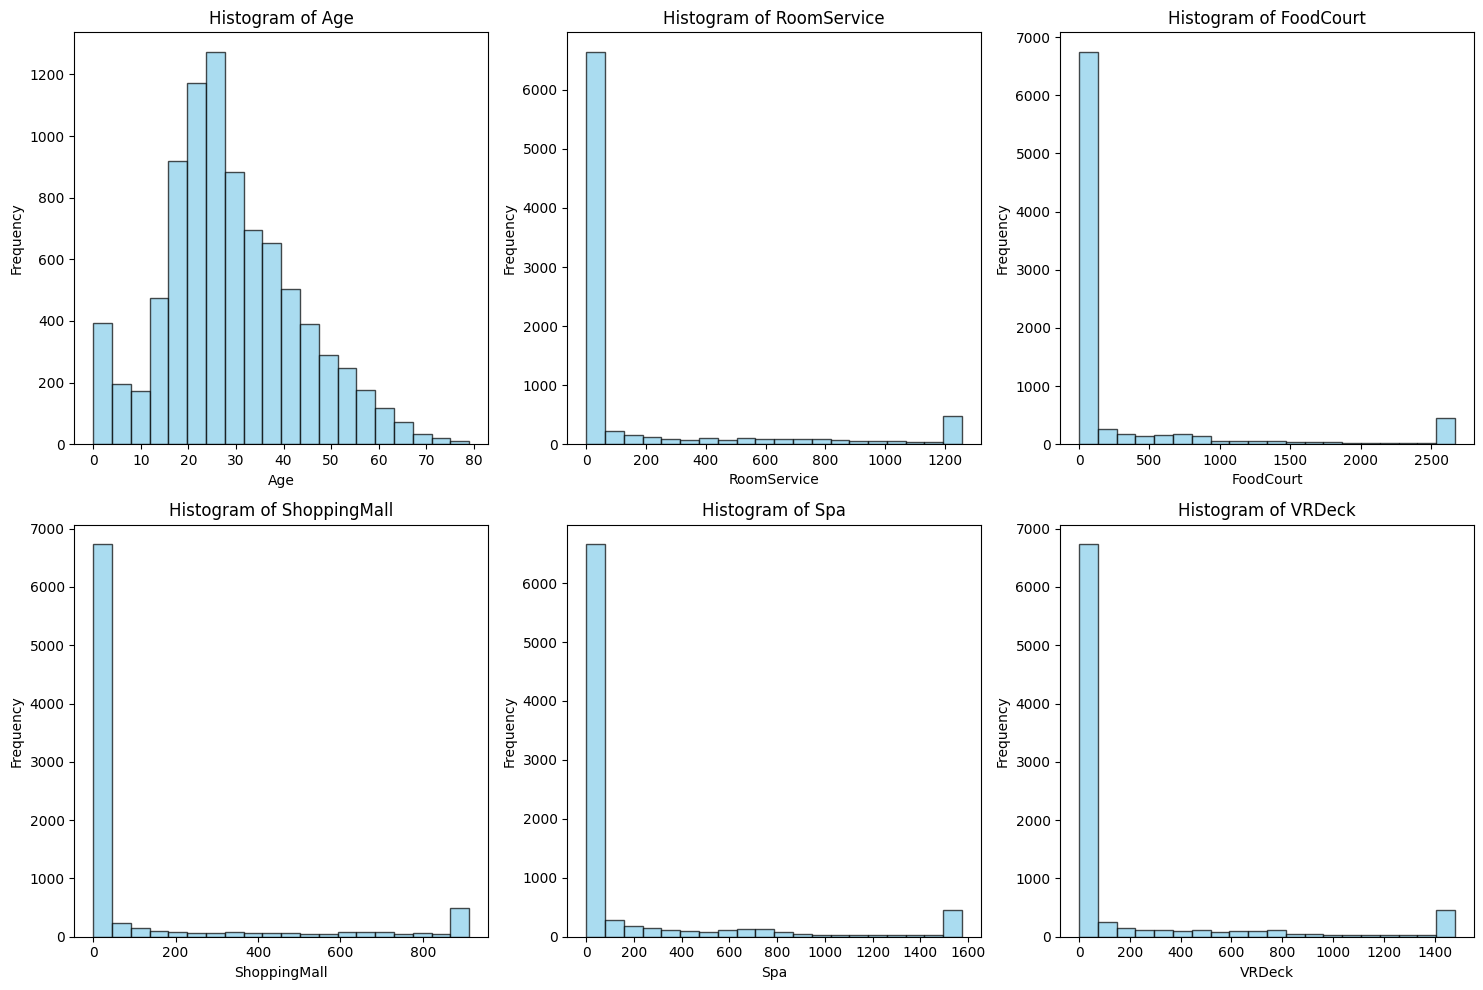

In [10]:
import matplotlib.pyplot as plt

# Set the figure size and loop through the columns
plt.figure(figsize=(15, 10))  # Adjust figure size for all plots
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)  # Create a grid of 2 rows and 3 columns
    plt.hist(train_data[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust spacing
plt.show()

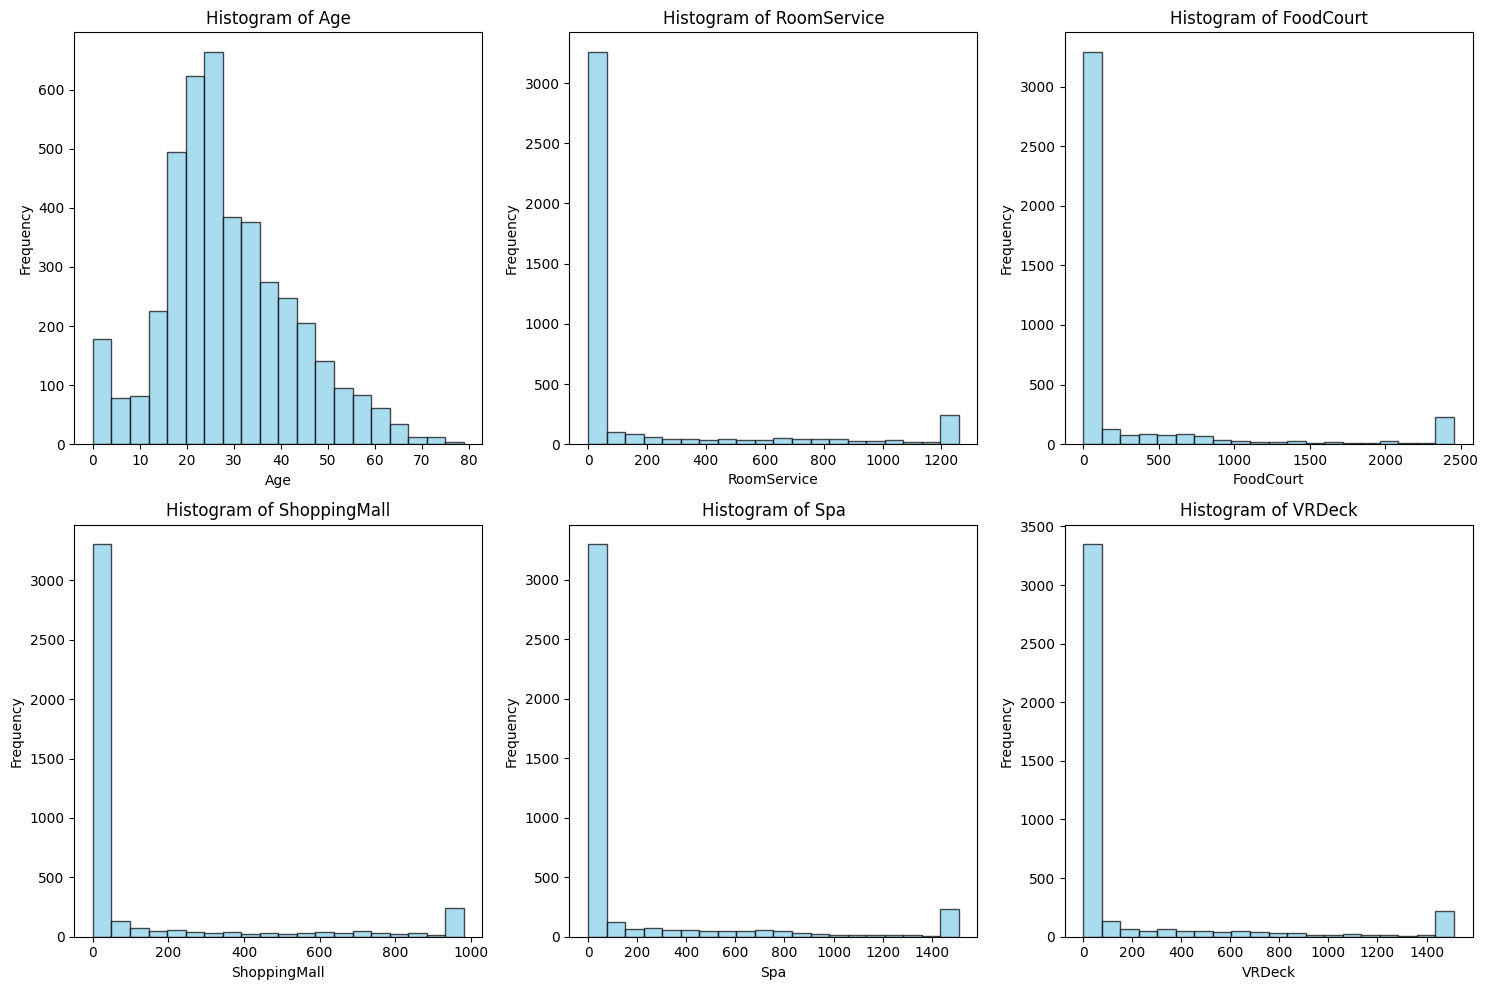

In [11]:
import matplotlib.pyplot as plt

# Set the figure size and loop through the columns
plt.figure(figsize=(15, 10))  # Adjust figure size for all plots
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)  # Create a grid of 2 rows and 3 columns
    plt.hist(test_data[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust spacing
plt.show()

In [12]:
# Apply log transformation (add 1 to avoid log(0))
skewed_col = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for cols in skewed_col:
    train_data[f"{cols}_log"] = np.log1p(train_data[cols])

for cols in skewed_col:
    test_data[f"{cols}_log"] = np.log1p(test_data[cols])

In [13]:
from scipy.stats import skew

skew_column = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
print('Training Dataset')
for column in skew_column:
    original_skewness = skew(train_data[column])
    log_transformed_skewness = skew(np.log1p(train_data[column]))  # Using np.log1p to handle zeros
    print(f"Skewness of {column} (Original):", original_skewness)
    print(f"Skewness of {column} (Log Transformed):", log_transformed_skewness)

print('Testing Dataset')
for column in skew_column:
    original_skewness = skew(test_data[column])
    log_transformed_skewness = skew(np.log1p(test_data[column]))  # Using np.log1p to handle zeros
    print(f"Skewness of {column} (Original):", original_skewness)
    print(f"Skewness of {column} (Log Transformed):", log_transformed_skewness)

Training Dataset
Skewness of RoomService (Original): 2.222546687025646
Skewness of RoomService (Log Transformed): 1.1090015134733529
Skewness of FoodCourt (Original): 2.6849607670091054
Skewness of FoodCourt (Log Transformed): 1.0888251105986417
Skewness of ShoppingMall (Original): 2.2192601649494565
Skewness of ShoppingMall (Log Transformed): 1.1872708292841354
Skewness of Spa (Original): 2.5070576903453587
Skewness of Spa (Log Transformed): 1.0525309590294438
Skewness of VRDeck (Original): 2.4670302415165617
Skewness of VRDeck (Log Transformed): 1.1206371052308892
Testing Dataset
Skewness of RoomService (Original): 2.168097321486911
Skewness of RoomService (Log Transformed): 1.0907795524826935
Skewness of FoodCourt (Original): 2.6239694445273756
Skewness of FoodCourt (Log Transformed): 1.0879996839064803
Skewness of ShoppingMall (Original): 2.274806040159556
Skewness of ShoppingMall (Log Transformed): 1.1646791079151155
Skewness of Spa (Original): 2.465103987603521
Skewness of Spa (L

In [14]:
# #Square root transformation
# train_data['RoomService_sqrt'] = np.sqrt(train_data['RoomService'])
# train_data['FoodCourt_sqrt'] = np.sqrt(train_data['FoodCourt'])
# train_data['ShoppingMall_log'] = np.sqrt(train_data['ShoppingMall'])
# train_data['Spa_log'] = np.sqrt(train_data['Spa'])
# train_data['VRDeck_log'] = np.sqrt(train_data['VRDeck'])

In [15]:
# from scipy.stats import boxcox

# # Apply Box-Cox transformation (returns transformed data and lambda value)
# train_data['RoomService_boxcox'], _ = boxcox(train_data['RoomService'] + 1)  # Add 1 to handle zeros
# train_data['FoodCourt_boxcox'], _ = boxcox(train_data['FoodCourt'] + 1)
# train_data['ShoppingMall_boxcox'], _ = boxcox(train_data['ShoppingMall'] + 1)
# train_data['Spa_boxcox'], _ = boxcox(train_data['Spa'] + 1)
# train_data['VRDeck_boxcox'], _ = boxcox(train_data['VRDeck'] + 1)

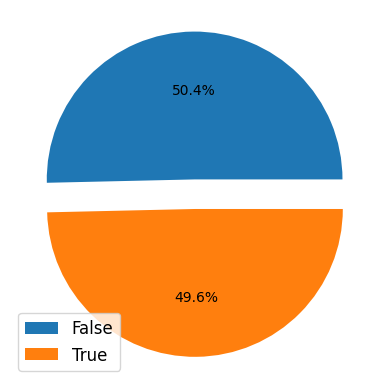

In [16]:
#PieChart
plt.pie(train_data.Transported.value_counts(), shadow=False, explode= [.1,.1], autopct = '%.1f%%')
plt.legend(['False', 'True'], loc='best', fontsize=12)

<Axes: xlabel='HomePlanet', ylabel='count'>

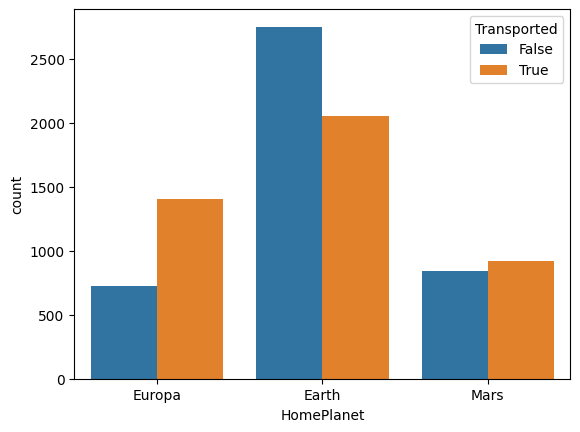

In [17]:
#CountPlot Visualization
sns.countplot(x='HomePlanet', hue='Transported', data=train_data)

<Axes: xlabel='Destination', ylabel='count'>

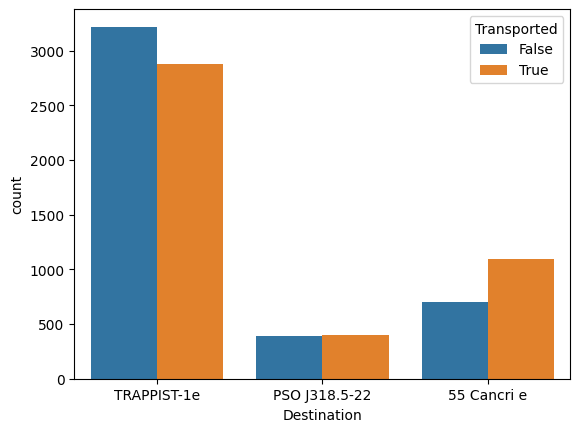

In [18]:
sns.countplot(x='Destination', hue='Transported', data = train_data)

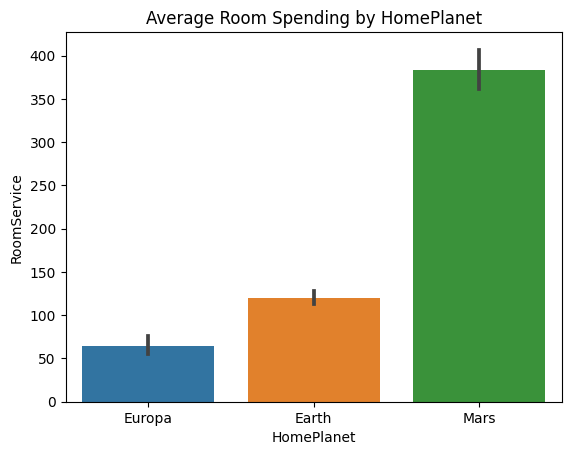

In [19]:
#bar graph visualization
sns.barplot(x='HomePlanet', y='RoomService', data=train_data)
plt.title('Average Room Spending by HomePlanet')
plt.show()

**Feature Engineering**

In [20]:
#Feature Engineering
train_data['Total_Spent'] = train_data['RoomService'] + train_data['FoodCourt'] + train_data['VRDeck'] + train_data['Spa']
test_data['Total_Spent'] = test_data['RoomService'] + test_data['FoodCourt'] + test_data['VRDeck'] + test_data['Spa']

train_data['CryoSleep_VIP'] = train_data['CryoSleep'] * train_data['VIP']
test_data['CryoSleep_VIP'] = test_data['CryoSleep'] * test_data['VIP']

train_data[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = test_data['Cabin'].str.split('/', expand=True)

spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_data['Total_Spent'] = train_data[spending_cols].sum(axis=1)
train_data['Has_Spending'] = train_data['Total_Spent'] > 0

test_data['Total_Spent'] = test_data[spending_cols].sum(axis=1)
test_data['Has_Spending'] = test_data['Total_Spent'] > 0

In [21]:
# Dropping unnecessary columns
train_data.drop(['Name' ,'PassengerId'], axis=1, inplace = True)
test_data.drop(['Name','PassengerId'], axis=1, inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination', 'CryoSleep_VIP', 'Has_Spending', 'Cabin_Side', 'Cabin_Num', 'Cabin_Deck', 'Has_Spending', 'Cabin']

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Loop over each categorical column
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    
    # Fit the encoder on the training data and transform it
    train_data[col] = label_encoders[col].fit_transform(train_data[col].astype(str))
    
    # If the column is also in the test data, transform the test data
    if col in test_data.columns:
        # Handle unseen labels by applying a custom function
        test_data[col] = test_data[col].astype(str).apply(
            lambda x: label_encoders[col].transform([x])[0]
            if x in label_encoders[col].classes_ 
            else -1  # Assign -1 for unseen labels
        )

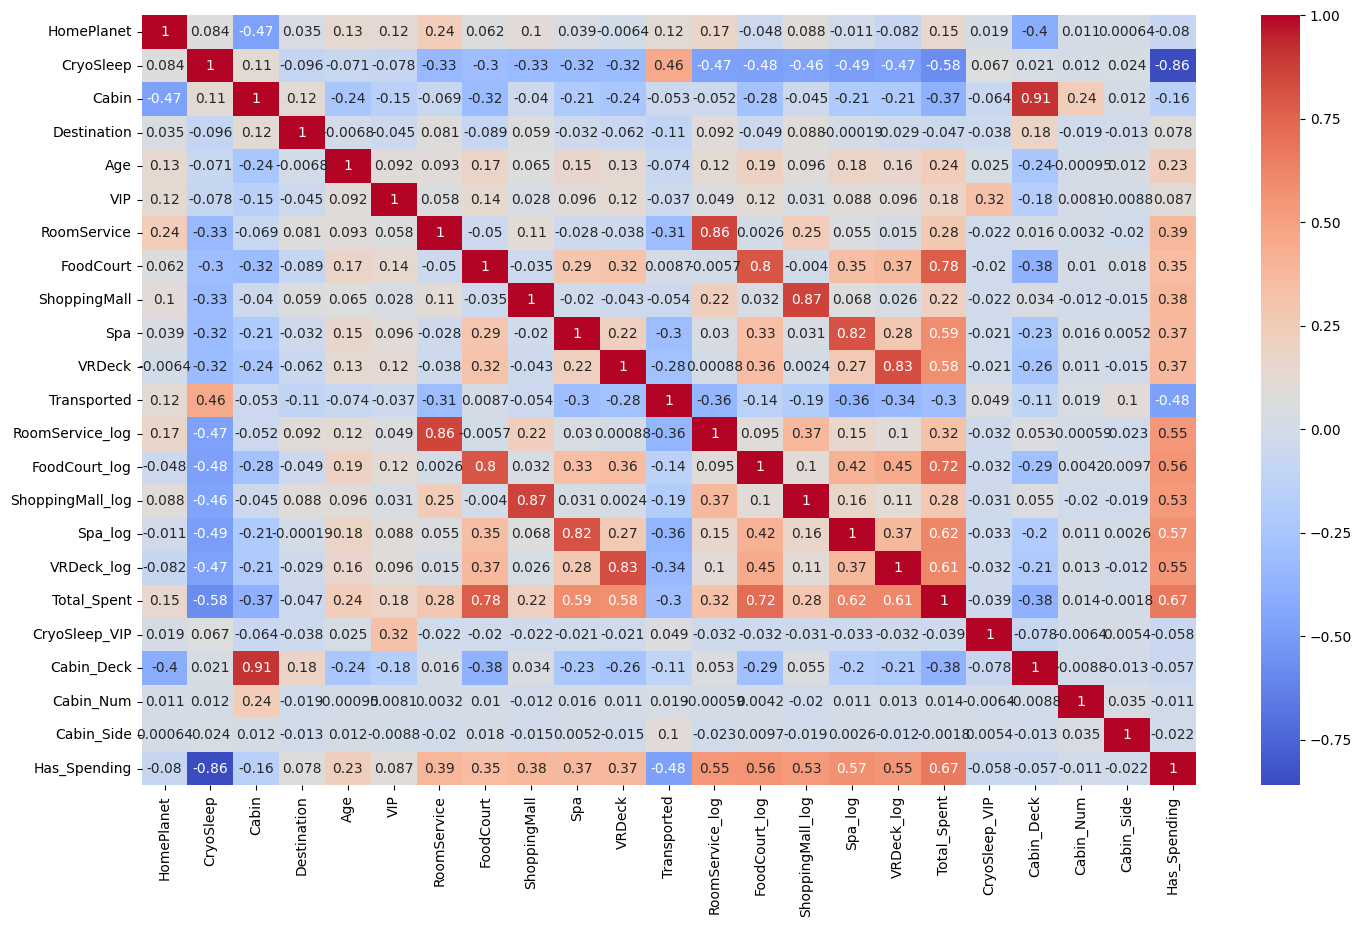

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = train_data.corr()
plt.figure(figsize=(17,10))
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.show()

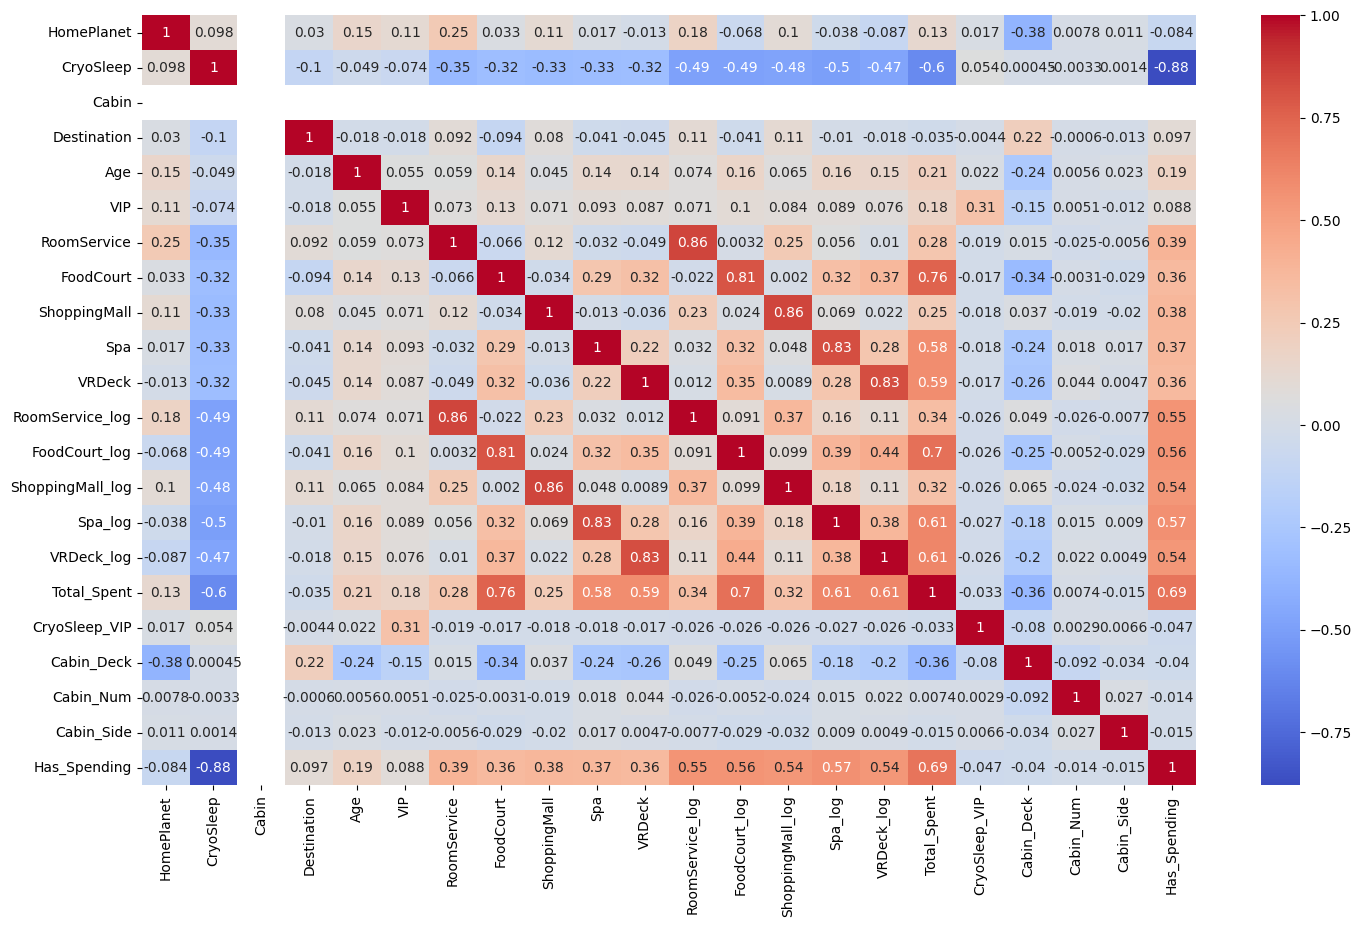

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = test_data.corr()
plt.figure(figsize=(17,10))
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.show()

In [26]:
# Dropping unnecessary columns
train_data.drop(['Cabin', 'FoodCourt', 'RoomService','FoodCourt', 'ShoppingMall','Spa', 'VRDeck','Has_Spending'], axis=1, inplace = True)
test_data.drop(['Cabin', 'FoodCourt', 'RoomService','FoodCourt', 'ShoppingMall','Spa', 'VRDeck','Has_Spending'], axis=1, inplace=True)

In [27]:
#separating the features (x) and target variable (y) from the training dataset. 
x = train_data.drop('Transported', axis=1)
y = train_data['Transported']

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [29]:
from sklearn.tree import DecisionTreeClassifier

#decision tree model
d_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5, max_features = 'sqrt')
d_tree

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5)

In [30]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier 
rf = RandomForestClassifier(max_depth=10, min_samples_split = 5, min_samples_leaf = 5, max_features = 'sqrt')
rf

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5)

In [31]:
#Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier 
gb = GradientBoostingClassifier(n_estimators= 100, learning_rate = 0.1, max_depth=3, min_samples_leaf=5, subsample=0.8, random_state=42)
gb

GradientBoostingClassifier(min_samples_leaf=5, random_state=42, subsample=0.8)

In [32]:
print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")

Shape of x: (8693, 15)
Shape of y: (8693,)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd

split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

#initialize the models
models = [d_tree, log_reg, rf, gb]

for model in models:
    results = []
    print(model)
    for ratio in split_ratios:
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = ratio, random_state = 42)
    
        model.fit(x_train, y_train)
    
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
    
        #Calculate the metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average = 'weighted')
        recall = recall_score(y_test, y_test_pred, average = 'weighted')
        f1 = f1_score(y_test, y_test_pred, average = 'weighted')
    
        results.append({
            'Train-Test Ratio': f'{int((1-ratio)*100)}:{int(ratio*100)}',
            'Train Accuracy' : train_accuracy,
            'Test Accuracy': test_accuracy, 
            'Precision': precision, 
            'Recall': recall, 
            'F1-Measure': f1
        })
    
    results_df = pd.DataFrame(results)

    pd.set_option('display.width', 1000)
    pd.set_option('display.max_columns', None)

    print(results_df)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5)
  Train-Test Ratio  Train Accuracy  Test Accuracy  Precision    Recall  F1-Measure
0            90:10        0.805701       0.729885   0.729898  0.729885    0.729890
1            80:20        0.818522       0.765382   0.766747  0.765382    0.764956
2            70:30        0.815283       0.761887   0.763502  0.761887    0.761355
3            60:40        0.825503       0.751006   0.751496  0.751006    0.750747
4            50:50        0.836861       0.762595   0.762640  0.762595    0.762516
5            40:60        0.819097       0.755752   0.755998  0.755752    0.755650
6            30:70        0.831991       0.764049   0.764080  0.764049    0.764048
7            19:80        0.851554       0.740762   0.740845  0.740762    0.740722
8             9:90        0.855006       0.731979   0.732957  0.731979    0.731612
LogisticRegression()
  Train-Test Ratio  Train A

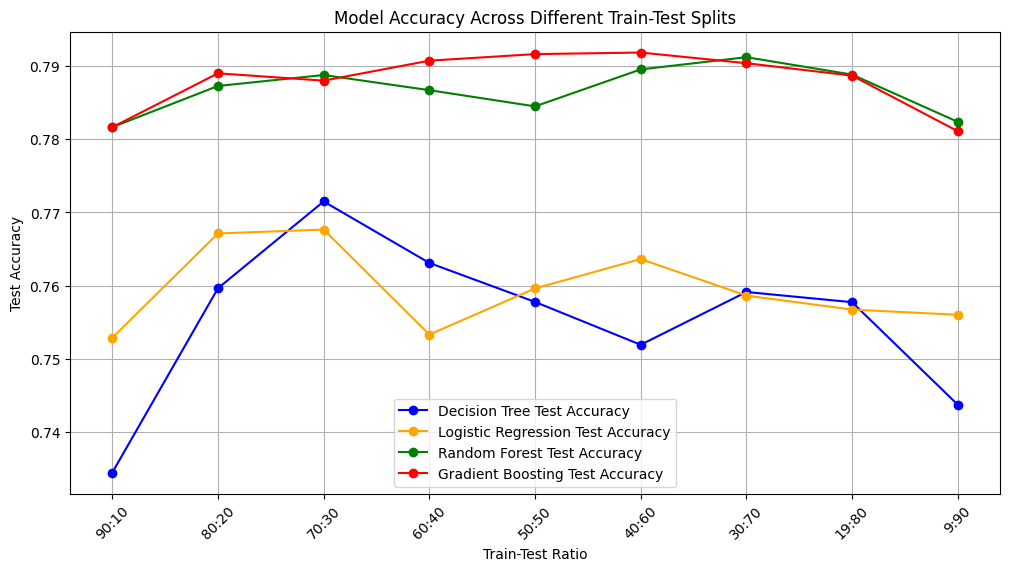

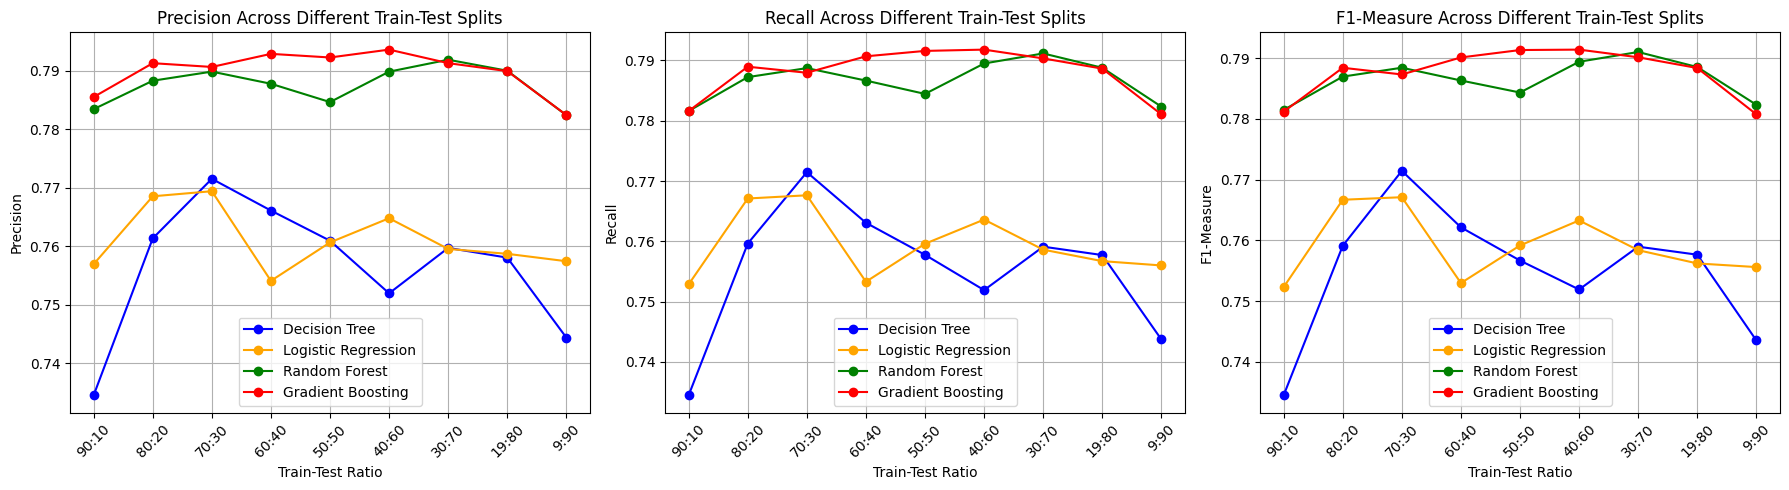

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define train-test split ratios
split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize results dictionary
results = {model: [] for model in ["Decision Tree", "Logistic Regression", "Random Forest", "Gradient Boosting"]}

# Train and evaluate models
models = {
    "Decision Tree": d_tree,
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "Gradient Boosting": gb
}

# Define consistent colors for each model
model_colors = {
    "Decision Tree": "blue",
    "Logistic Regression": "orange",
    "Random Forest": "green",
    "Gradient Boosting": "red"
}

for model_name, model in models.items():
    for ratio in split_ratios:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ratio, random_state=42)

        model.fit(x_train, y_train)
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        results[model_name].append({
            "Train-Test Ratio": f"{int((1-ratio)*100)}:{int(ratio*100)}",
            "Train Accuracy": accuracy_score(y_train, y_train_pred),
            "Test Accuracy": accuracy_score(y_test, y_test_pred),
            "Precision": precision_score(y_test, y_test_pred, average='weighted'),
            "Recall": recall_score(y_test, y_test_pred, average='weighted'),
            "F1-Measure": f1_score(y_test, y_test_pred, average='weighted')
        })

# Convert results to DataFrames
df_results = {model: pd.DataFrame(results[model]) for model in models}

# Plot Accuracy Comparison
plt.figure(figsize=(12, 6))
for model in models:
    plt.plot(df_results[model]["Train-Test Ratio"], df_results[model]["Test Accuracy"], 
             marker='o', label=f"{model} Test Accuracy", color=model_colors[model])

plt.xlabel("Train-Test Ratio")
plt.ylabel("Test Accuracy")
plt.title("Model Accuracy Across Different Train-Test Splits")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Plot Precision, Recall, and F1-score
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
metrics = ["Precision", "Recall", "F1-Measure"]

for i, metric in enumerate(metrics):
    ax[i].set_title(f"{metric} Across Different Train-Test Splits")
    for model in models:
        ax[i].plot(df_results[model]["Train-Test Ratio"], df_results[model][metric], 
                   marker='o', label=model, color=model_colors[model])
    ax[i].set_xlabel("Train-Test Ratio")
    ax[i].set_ylabel(metric)
    ax[i].legend()
    ax[i].grid()
    ax[i].set_xticklabels(df_results[model]["Train-Test Ratio"], rotation=45)

plt.tight_layout()
plt.show()

In [35]:
#cross validation rf classifier 
from sklearn.model_selection import cross_val_score

for model in models:
    print(model)
    scores = cross_val_score(rf, x, y, cv=5, scoring='accuracy')
    print(scores.mean())

Decision Tree
0.7898346403598222
Logistic Regression
0.7925957737969588
Random Forest
0.7925949135483205
Gradient Boosting
0.7909846604433192


In [36]:
x_train.shape

(869, 15)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
#Now going for DNN models
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=15),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [39]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    validation_split = 0.2, 
    epochs = 50, 
    batch_size = 32,
    callbacks = [early_stopping],
    verbose = 1
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.4787 - loss: 112.5132 - val_accuracy: 0.7184 - val_loss: 27.2792
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6235 - loss: 68.0774 - val_accuracy: 0.7471 - val_loss: 26.0616
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6611 - loss: 46.9288 - val_accuracy: 0.7471 - val_loss: 20.6456
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6420 - loss: 37.7938 - val_accuracy: 0.7471 - val_loss: 19.3817
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6289 - loss: 34.5064 - val_accuracy: 0.7471 - val_loss: 16.5536
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6604 - loss: 34.8683 - val_accuracy: 0.7471 - val_loss: 12.2750
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6252 - loss: 27.5528 - val_accuracy: 0.7184 - val_loss: 8.7132
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6294 - loss: 20.6243 - val_accuracy: 0.

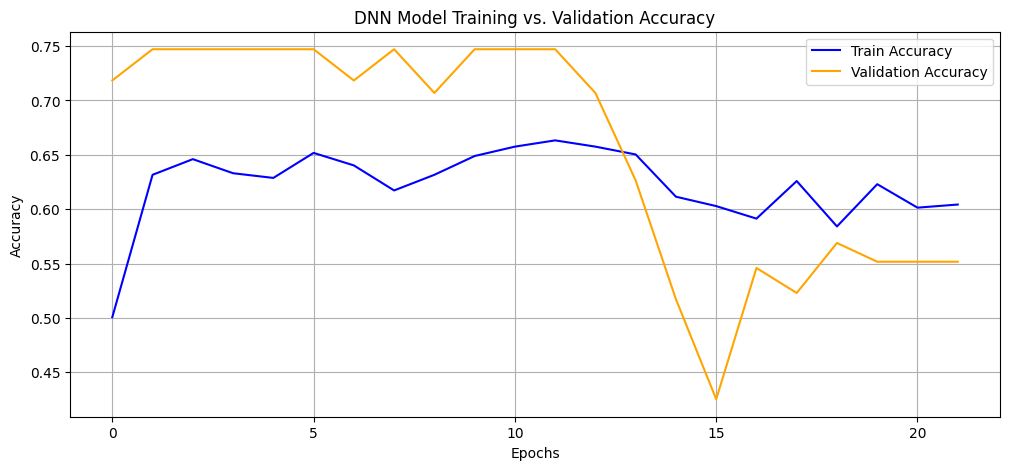

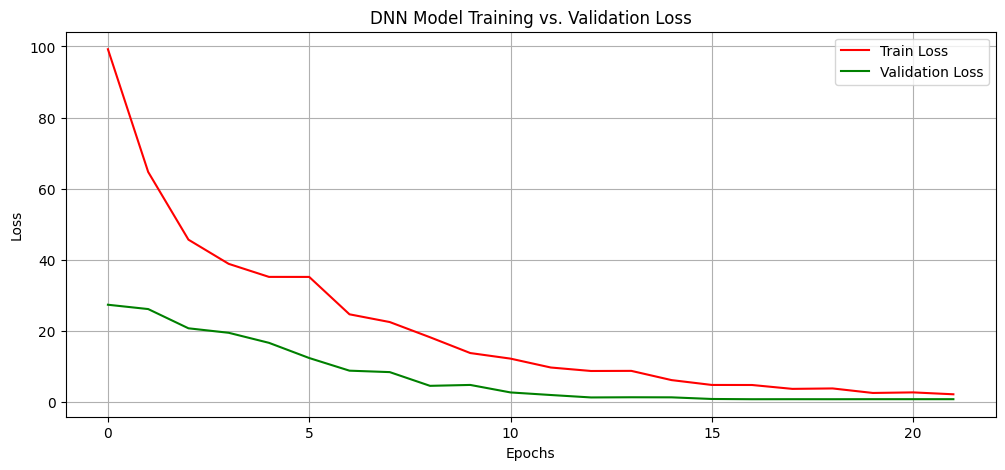

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('DNN Model Training vs. Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('DNN Model Training vs. Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [41]:
#evaluation on test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.48


In [42]:
#Hyperparameter Tuning - Keras Tuner 
import keras_tuner as kt

def build_model(hp):
    model = Sequential([
        Dense(
            units=hp.Int('units_1', min_value=32,max_value=128, step=16),
            activation='relu',
            input_dim=x_train.shape[1]
        ),
        Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(
            units = hp.Int('units_2', min_value=16, max_value=64, step=16),
            activation = 'relu'
        ),
        Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(1, activation = 'sigmoid')
    ])

    model.compile(
        optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
    )

    return model 

In [43]:
tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 10,
    executions_per_trial = 1, 
)

tuner.search(
    x_train, y_train,
    validation_split = 0.2, 
    epochs = 50,
    batch_size = 32, 
    callbacks = [EarlyStopping(monitor='val_loss', patience=5)],
    verbose=1
)

Trial 10 Complete [00h 00m 05s]
val_accuracy: 0.7528735399246216

Best val_accuracy So Far: 0.7701149582862854
Total elapsed time: 00h 00m 59s


In [44]:
#get the best hyperparameters 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Optimal number of units in first layer: {best_hps.get('units_1')}
Optimal number of units in second layer: {best_hps.get('units_2')}
Optimal dropout rates: {best_hps.get('dropout_1')},{best_hps.get('dropout_2')}
Optimal optimizer: {best_hps.get('optimizer')}
""")


Optimal number of units in first layer: 32
Optimal number of units in second layer: 48
Optimal dropout rates: 0.30000000000000004,0.30000000000000004
Optimal optimizer: adam



In [45]:
#build final model
final_model = tuner.hypermodel.build(best_hps)
final_model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs= 50,
    batch_size = 32, 
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
    verbose = 1
)

test_loss, test_accuracy = final_model.evaluate(x_test, y_test, verbose = 0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.5592 - loss: 91.7353 - val_accuracy: 0.7184 - val_loss: 21.6420
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5501 - loss: 66.6218 - val_accuracy: 0.7356 - val_loss: 25.7977
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6377 - loss: 49.4645 - val_accuracy: 0.7471 - val_loss: 20.4215
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6407 - loss: 39.7210 - val_accuracy: 0.7471 - val_loss: 15.8970
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5875 - loss: 43.0420 - val_accuracy: 0.7471 - val_loss: 13.4868
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6241 - loss: 31.6122 - val_accuracy: 0.7471 - val_loss: 11.7218
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6349 - loss: 25.8283 - val_accuracy: 0.7471 - val_loss: 9.7275
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6013 - loss: 26.2168 - val_accuracy: 0.7

In [46]:
# Step 1: Make predictions
test_predictions = final_model.predict(test_data)  # Use your best model
test_predictions = test_predictions.astype(bool)  # Convert to boolean

# Step 2: Prepare submission file
original_test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission = pd.DataFrame({
    'PassengerId': original_test_data['PassengerId'],
    'Transported': test_predictions.flatten()
})

# Step 3: Save submission file
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")

134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Submission file saved as 'submission.csv'
